In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BIKE DETAILS.csv")

In [3]:
data.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [14]:
data.shape

(1061, 7)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [17]:
data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [19]:
data.isnull()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False
1059,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [24]:
median_price = data['ex_showroom_price'].median()
data['ex_showroom_price'].fillna(median_price, inplace=True)

In [25]:
data.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


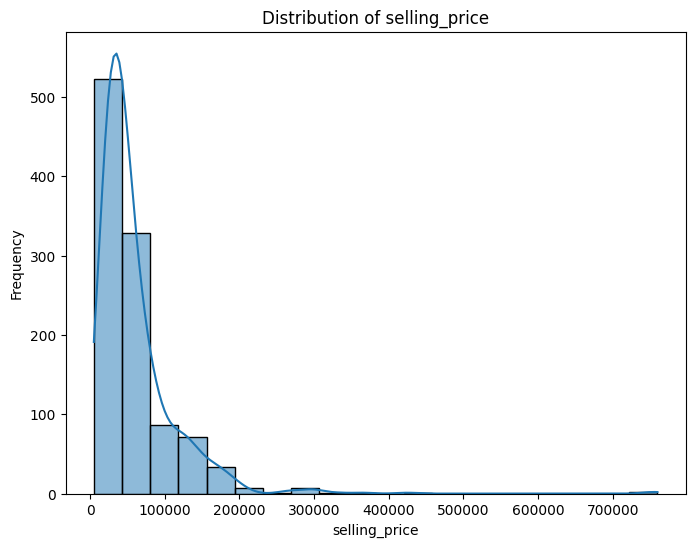

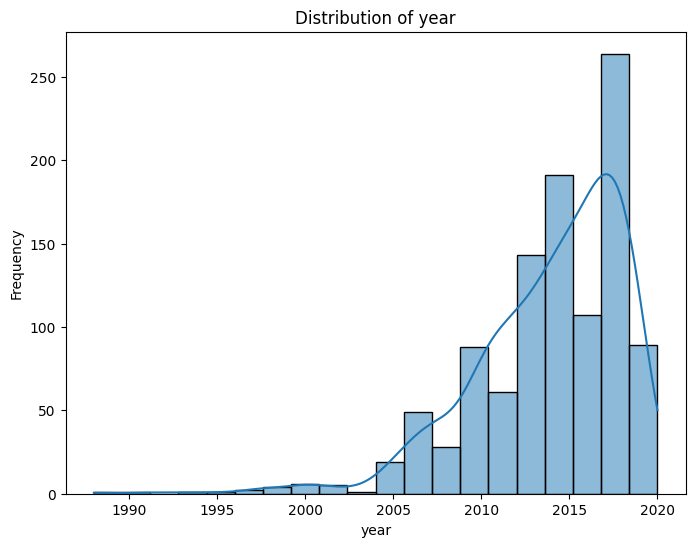

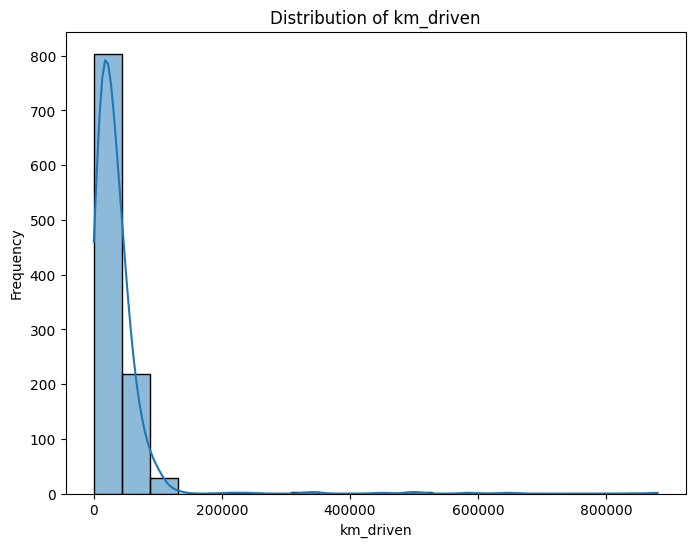

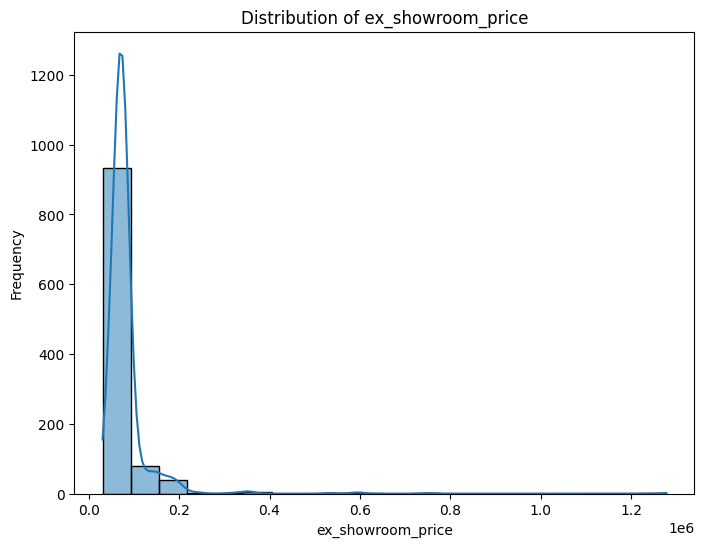

In [26]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [27]:
selling_price

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [28]:
price_range= selling_price.max()-selling_price.min()

In [29]:
print("The range of selling pricee is",price_range)

The range of selling pricee is 755000


In [30]:
median_price= selling_price.median()
print("the median selling price of bike is",median_price)

the median selling price of bike is 45000.0


In [31]:
data.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5


In [32]:
seller_type=data["seller_type"]

In [33]:
seller_type

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


In [36]:
most_common_seller= seller_type.mode()[0]

In [37]:
print("the most common sellertype is",most_common_seller)

the most common sellertype is Individual


In [38]:
data.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5


In [46]:
bike_driven=data[data["km_driven"]>50000]["name"]

In [47]:
bike_driven

,name
5,Honda CB Twister
15,Suzuki Access 125 [2007-2016]
20,Hero Passion Pro 110
31,Yamaha FZ S [2012-2016]
43,Hero Passion XPro
...,...
1049,Hero Super Splendor
1050,Bajaj Pulsar 150
1056,Activa 3g
1059,Honda CB Shine


In [42]:
num_over_50k=len(bike_driven)

In [48]:
print("number of bike driven more than 50k km:")
for bike_name in bike_driven:
    print(bike_name)

number of bike driven more than 50k km:
Honda CB Twister
Suzuki Access 125 [2007-2016]
Hero Passion Pro 110
Yamaha FZ S [2012-2016]
Hero Passion XPro
Hero Achiever 150
Bajaj Discover 125
Hero Honda Passion Plus
Bajaj Discover 125
Hero Xtreme Sports
TVS Apache RTR 160
Bajaj Xcd
Hero CD Deluxe
Honda Activa [2000-2015]
Suzuki GS150R
Hero Honda Passion Plus
Bajaj Discover 100
Bajaj Pulsar 180
Hero Honda CBZ extreme
Hero Xtreme Sports
Honda Activa [2000-2015]
Bajaj Pulsar 150
Hero HF Deluxe
Bajaj Discover 150
Honda CB Unicorn 160
Bajaj Pulsar 180
TVS Sport
Yamaha FZ16
Bajaj Discover 150F
Bajaj Pulsar 180
Yamaha FZ S [2012-2016]
Bajaj Pulsar 150
Hero Honda Glamour
Hero Honda Passion
Hero Karizma 2014
Honda Aviator
Hero Maestro Edge
Bajaj Discover 125
Hero Honda Splendor Plus
Bajaj Xcd
Honda CB Unicorn 150
Honda CB Unicorn 150
Bajaj Pulsar 150
Hero Honda CBZ extreme
Yamaha FZ16
Bajaj Pulsar 135 LS
Bajaj Pulsar 135 LS
Yamaha Fascino 110
Yamaha FZ S V 2.0
Hero Honda CD100SS
Royal Enfield Bullet

In [49]:
print("number of bike driven more than 50k km",num_over_50k)

number of bike driven more than 50k km 170


In [50]:
data.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5


In [51]:
average_kmdriven_ownership=data.groupby("owner")["km_driven"].mean()

In [52]:
print("average km driven buy ownership",average_kmdriven_ownership)

average km driven buy ownership owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [53]:
total_bike=len(data)

In [54]:
older_biker=data[data["year"]<=2015]
num_older_biker=len(older_biker)

In [58]:
proportion_older_biker=num_older_biker/total_bike
print("proportion of bikes from 2015 or older",proportion_older_biker)

proportion of bikes from 2015 or older 0.5664467483506126


In [59]:
missing_percentages = data.isnull().sum() / len(data) * 100

In [60]:
missing_percentages

,0
name,0.0
selling_price,0.0
year,0.0
seller_type,0.0
owner,0.0
km_driven,0.0
ex_showroom_price,0.0


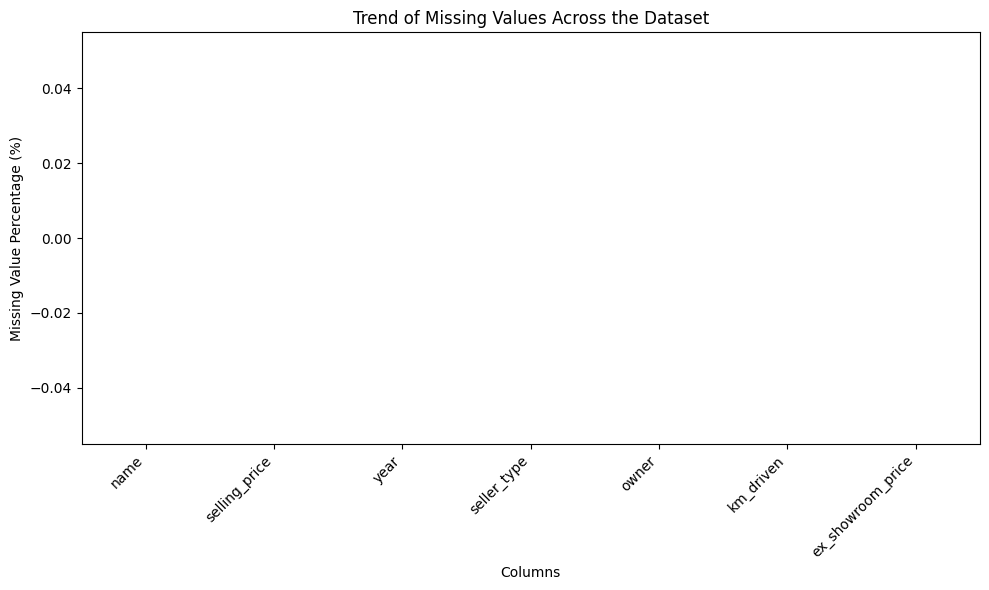

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.title("Trend of Missing Values Across the Dataset")
plt.xlabel("Columns")
plt.ylabel("Missing Value Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
max_price=data["ex_showroom_price"].max()

In [63]:
max_price

1278000.0

In [64]:
bike_with_max_price= data[data["ex_showroom_price"]==max_price]["name"].values[0]

In [65]:
print(f"Highest ex_showroom_price: {max_price}")
print(f"Bike with the highest ex_showroom_price: {bike_with_max_price}")

Highest ex_showroom_price: 1278000.0
Bike with the highest ex_showroom_price: Harley-Davidson Street Bob


In [66]:
data.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5


In [67]:
bikes_by_seller_type = data['seller_type'].value_counts()

In [68]:
print("total number of bikes listed by each seller type:")
print(bikes_by_seller_type)

total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [69]:
first_owner_bikes=data[data["owner"]=="First Owner"]

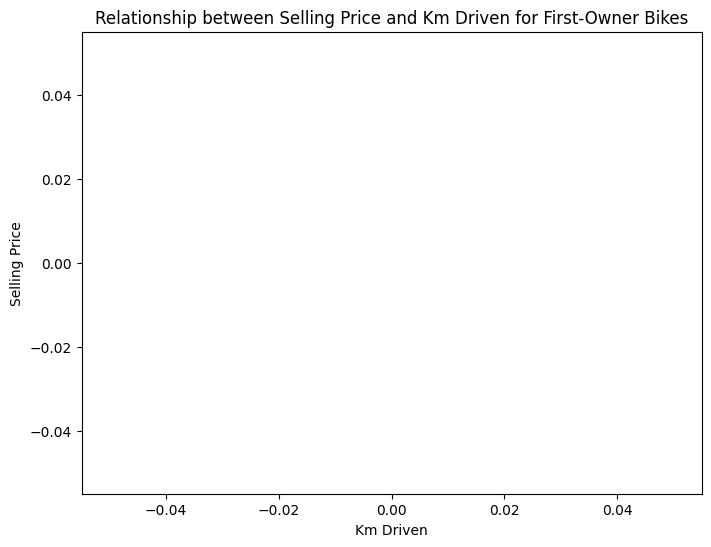

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

In [78]:
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation coefficient between selling_price and km_driven for first-owner bikes: {correlation:.2f}")

Correlation coefficient between selling_price and km_driven for first-owner bikes: nan


In [79]:
Q1=data["km_driven"].quantile(0.25)
Q3=data["km_driven"].quantile(0.75)
IQR=Q3-Q1

In [80]:
IQR

29500.0

In [81]:
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [82]:
upper_bound

87250.0

In [83]:
lower_bound

-30750.0

In [84]:
data_no_outliers=data[(data["km_driven"]>=lower_bound)&(data["km_driven"]<=upper_bound)]

In [85]:
print("original data shape",data.shape)
print("data shape after removing oultlier:",data_no_outliers.shape)

original data shape (1061, 7)
data shape after removing oultlier: (1022, 7)


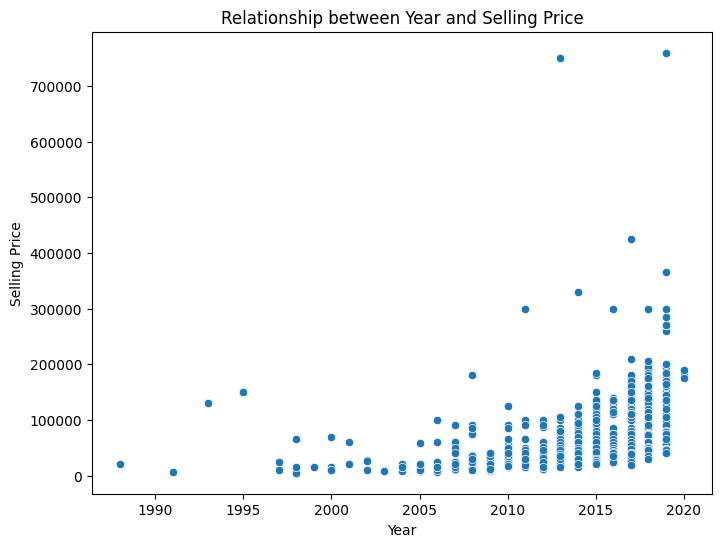

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='selling_price', data=data)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

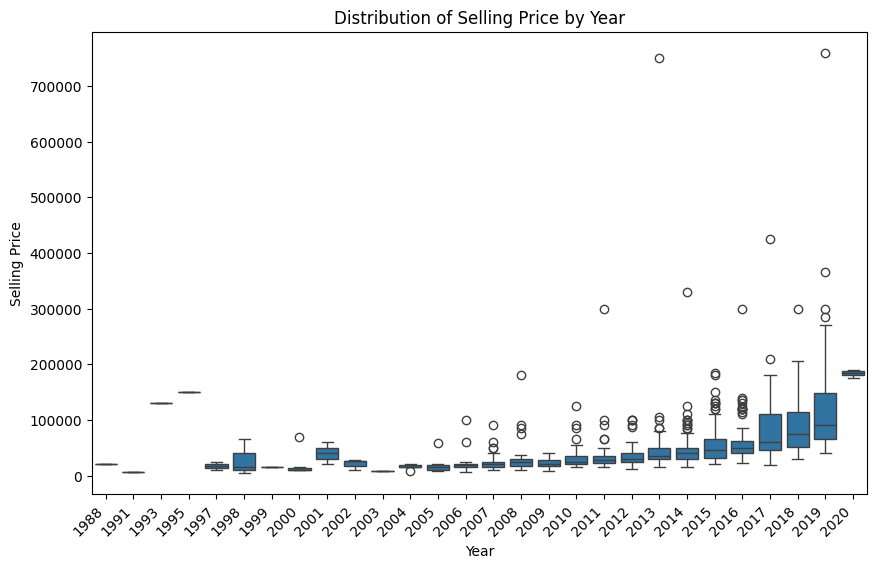

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=data)
plt.title('Distribution of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

In [89]:
data.head(2)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5


In [88]:
current_year=2025

In [90]:
data["bike_age"]=current_year-data["year"]

In [91]:
data["bike_age"]

,bike_age
0,6
1,8
2,7
3,10
4,14
...,...
1056,15
1057,13
1058,12
1059,16


In [92]:
data["depreciation"]=data['ex_showroom_price']-data['selling_price']
average_depreciation_by_age = data.groupby('bike_age')['depreciation'].mean()
print("avearage depreciation by age:")
print(average_depreciation_by_age)

avearage depreciation by age:
bike_age
5    -82918.333333
6    -23870.744186
7      1613.832061
8      6692.759398
9     21484.817757
10    24101.120000
11    32211.895604
12    38084.315068
13    35616.935714
14    43122.278689
15    43275.500000
16    44543.714286
17    38926.053571
18    46713.844828
19    45054.900000
20    54495.321429
21    54072.400000
22    64752.500000
23    52085.833333
24    23802.250000
25    51919.166667
26    57752.500000
27    44419.166667
28    55252.500000
30   -77247.500000
32   -57247.500000
34    66752.500000
37    52752.500000
Name: depreciation, dtype: float64


In [93]:
average_price_by_year = data.groupby('year')['selling_price'].mean()


In [94]:
average_price_by_year


,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [95]:
def is_significantly_overpriced(row, threshold=1.5):  # Adjust threshold as needed
    year = row['year']
    price = row['selling_price']
    avg_price_for_year = average_price_by_year.get(year, 0)  # Handle missing years
    return price > threshold * avg_price_for_year


In [96]:
data['overpriced'] = data.apply(is_significantly_overpriced, axis=1)
overpriced_bikes = data[data['overpriced']]['name'].tolist()
print("Bikes priced significantly above average for their year:")
for bike_name in overpriced_bikes:
    print(bike_name)


Bikes priced significantly above average for their year:
Royal Enfield Classic Gunmetal Grey
Royal Enfield Bullet 350 [2007-2011]
Yamaha YZF R3
Royal Enfield Classic Gunmetal Grey
Jawa Standard
Royal Enfield Thunderbird 350
Honda CBR-250R
Royal Enfield Thunderbird 350
Bajaj Dominar 400
KTM 390 Duke
Royal Enfield Electra 5 S
Royal Enfield Bullet 350
Royal Enfield Thunderbird 350
Royal Enfield Electra 4 S
Mahindra Mojo XT300
Hero Honda Karizma ZMR [2010]
Royal Enfield Thunderbird 350X
Royal Enfield Classic Gunmetal Grey
Royal Enfield Classic Desert Storm
Yamaha FZ25
Royal Enfield Thunderbird 350
UM Renegade Commando
Royal Enfield Classic Gunmetal Grey
Royal Enfield Classic 350
Royal Enfield Continental GT 650
Harley-Davidson Street Bob
KTM 390 Duke ABS [2013-2016]
Royal Enfield Classic 350
Royal Enfield Classic 500
Bajaj Dominar 400
Royal Enfield Thunderbird 350X
KTM RC 390
Royal Enfield Thunderbird 350
KTM 390 Duke
Royal Enfield Bullet 350
Bajaj Pulsar 150
Royal Enfield Classic Desert S

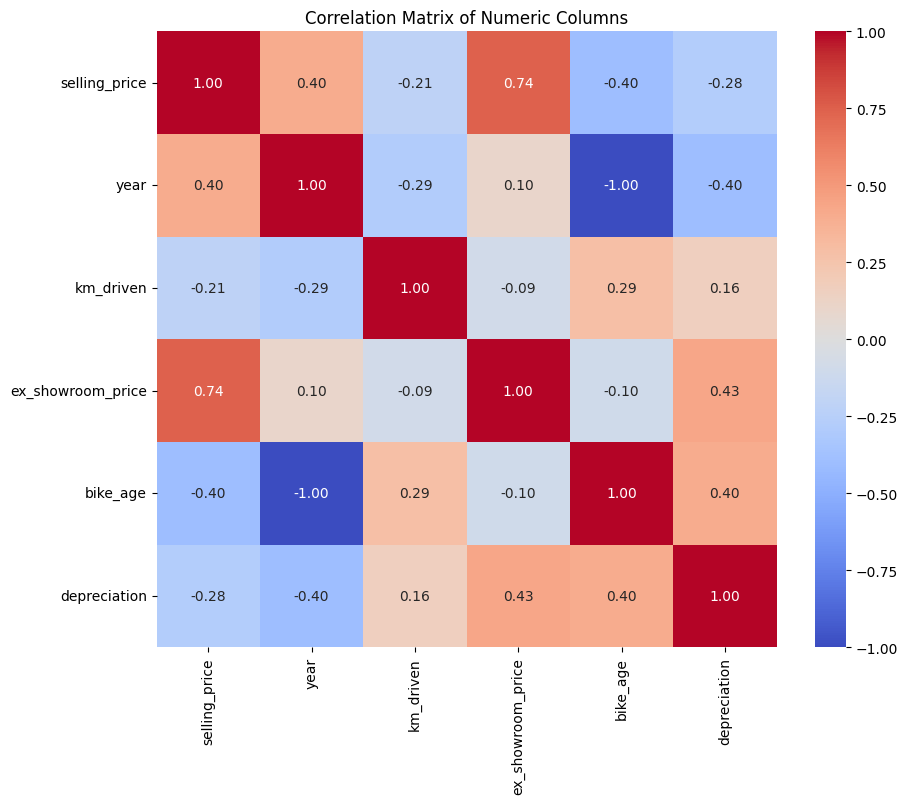

In [97]:
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# EDA 2 on Car

In [5]:
data1=pd.read_csv("Car Sale.csv")

In [6]:
data1.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [7]:
data1.shape

(23906, 16)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [10]:
data1.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [11]:
data1.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [12]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealersE
average_selling_price_by_dealer=data1.groupby("Dealer_Name")["Price ($)"].mean()

In [13]:
print("aveearge selling price by dealere:")
print(average_selling_price_by_dealer)

aveearge selling price by dealere:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.

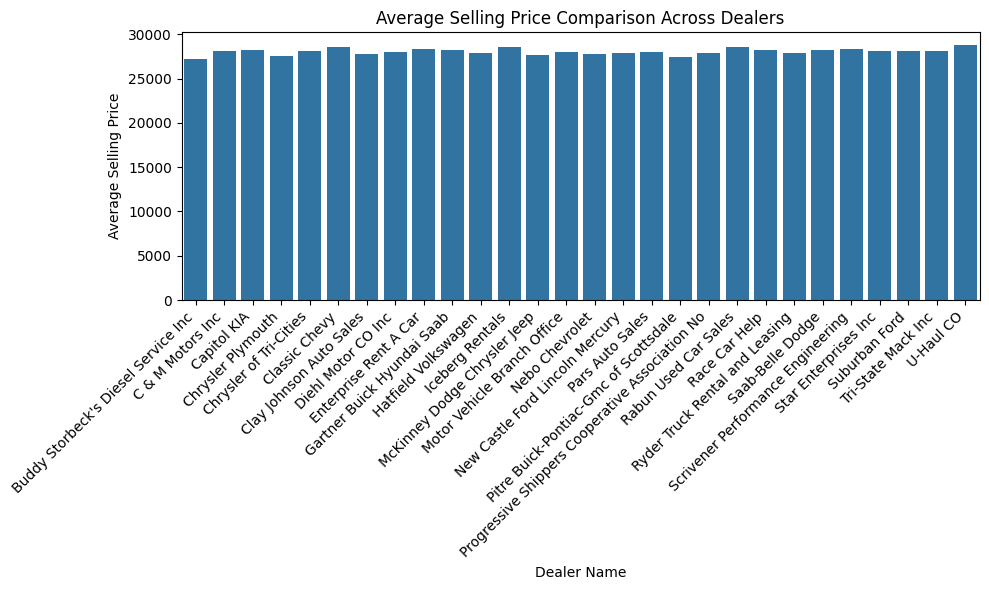

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_selling_price_by_dealer.index, y=average_selling_price_by_dealer.values)
plt.title('Average Selling Price Comparison Across Dealers')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [15]:
data1.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [16]:
#Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends
price_varuiation_by_brand= data1.groupby("Company")["Price ($)"].std()

In [17]:
brand_with_highest_varuiation=price_varuiation_by_brand.idxmax()

In [18]:
print(f"the car brand with highest price varuiation is: {brand_with_highest_varuiation}")
print(f"price varitaion(stnadard deviation):{price_varuiation_by_brand.max():.2f}")

the car brand with highest price varuiation is: Lincoln
price varitaion(stnadard deviation):19658.05


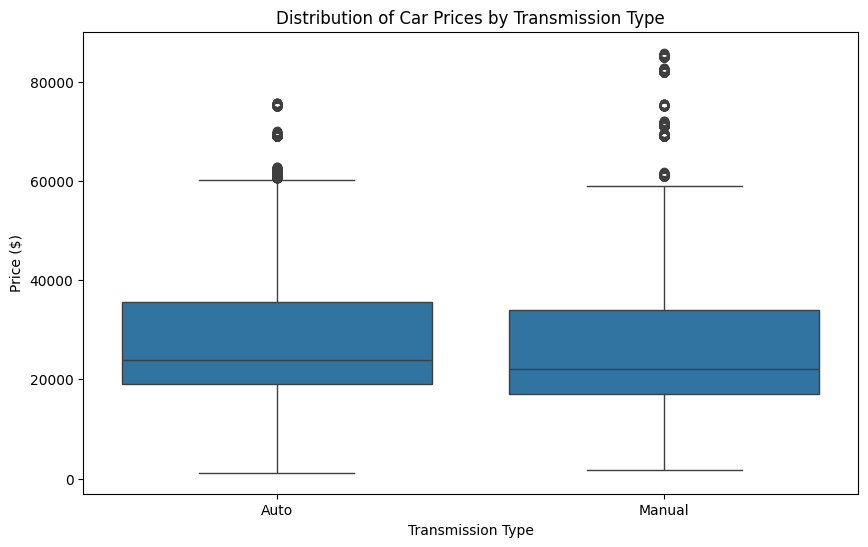

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=data1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

In [20]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compareE
def calculate_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return IQR


In [23]:
automatic_iqr = calculate_iqr(data1[data1['Transmission'] == 'Automatic'], 'Price ($)')
manual_iqr = calculate_iqr(data1[data1['Transmission'] == 'Manual'], 'Price ($)')

print(f"IQR for Automatic Transmission: {automatic_iqr}")
print(f"IQR for Manual Transmission: {manual_iqr}")


IQR for Automatic Transmission: nan
IQR for Manual Transmission: 17000.0


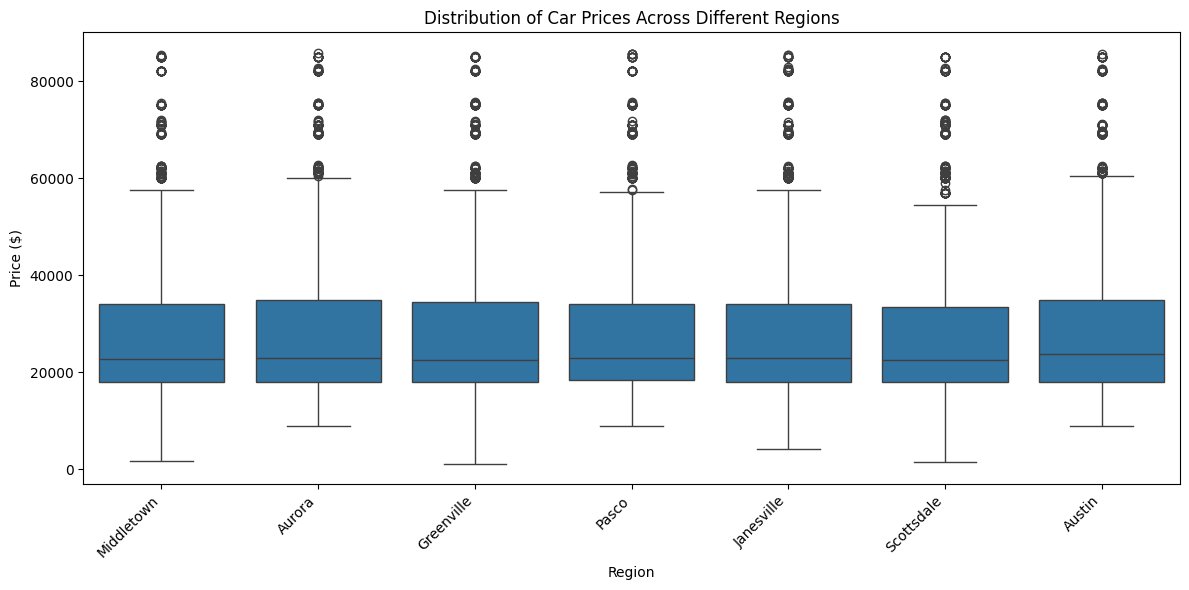

In [25]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data1)  # Replace 'Region' with your column name
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [27]:
#What is the distribution of car prices across different regions
region_stats = data1.groupby('Dealer_Region')['Price ($)'].describe()
print(region_stats)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [28]:
data1.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [29]:
#What is the distribution of cars based on body stylesE
body_style_counts = data1['Body Style'].value_counts()

In [30]:
body_style_counts

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


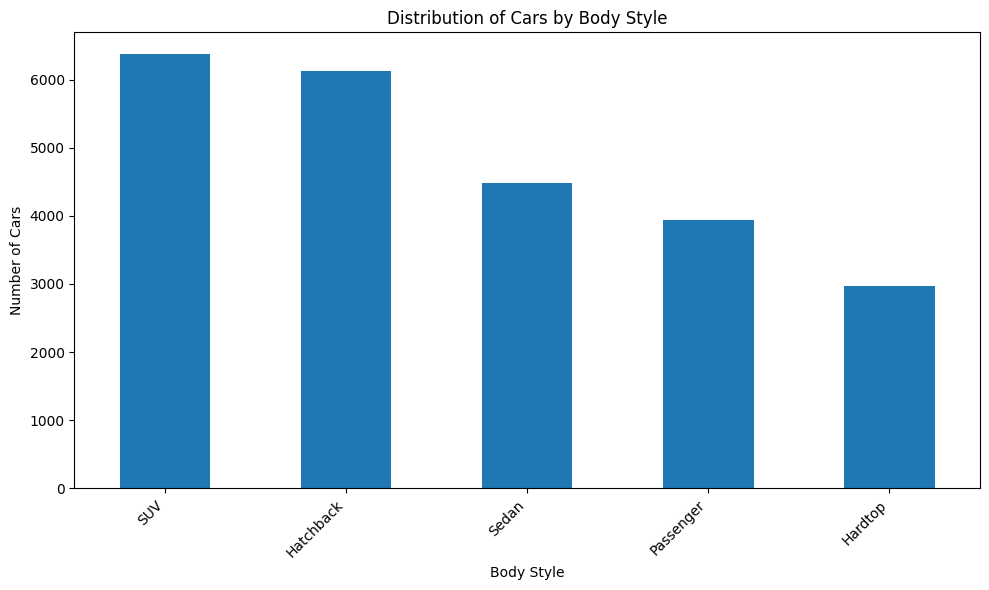

In [31]:
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
#How does the average selling price of cars vary by customer gender and annual incomeE
average_price_by_gender_income = data1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

In [33]:
average_price_by_gender_income

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


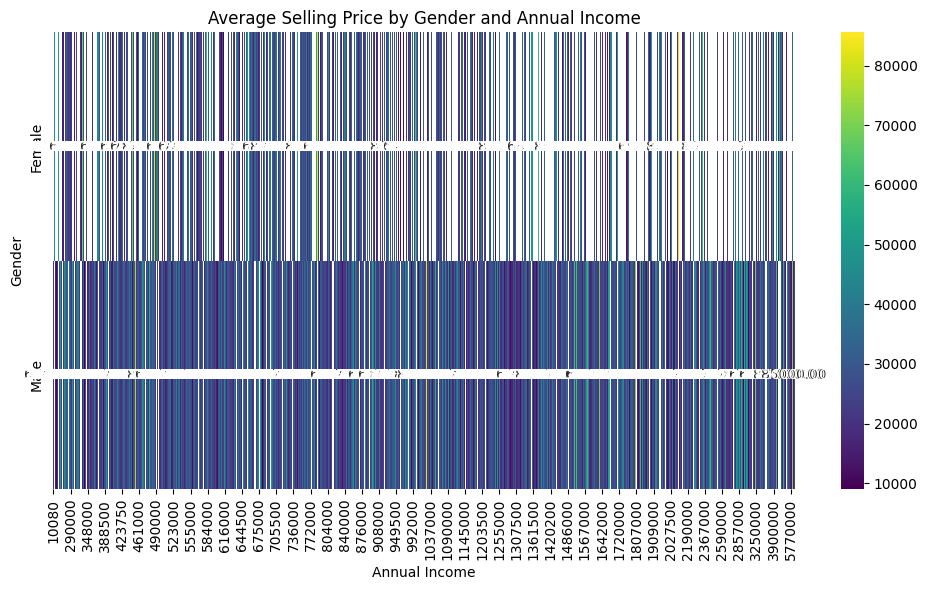

In [34]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
heatmap_data = average_price_by_gender_income.pivot(index='Gender', columns='Annual Income', values='Price ($)')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

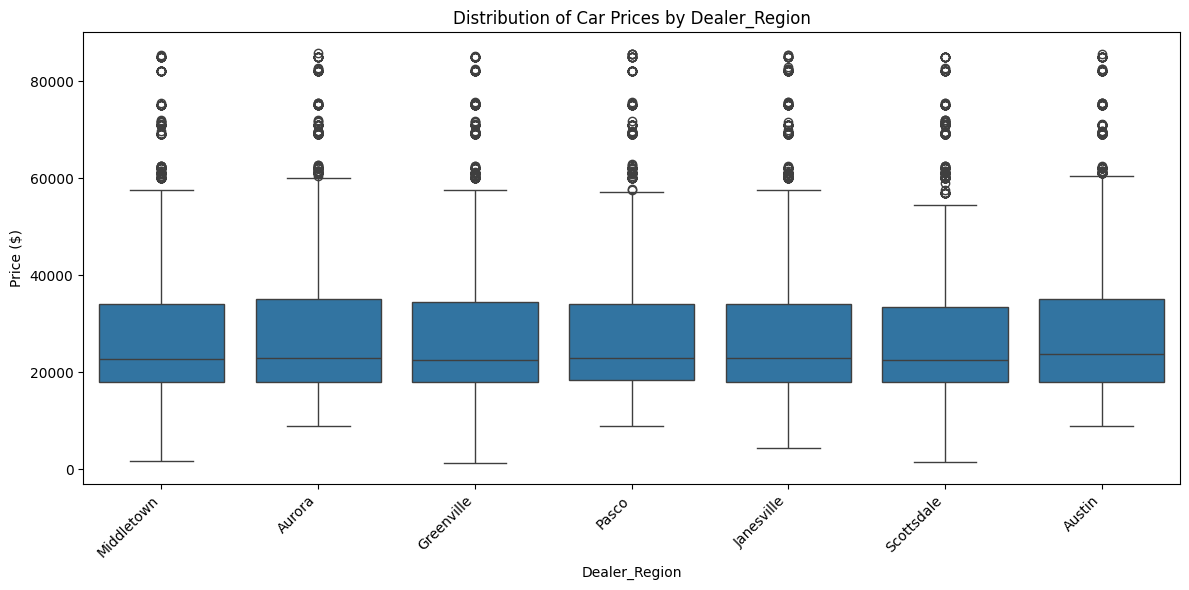

In [36]:
#What is the distribution of car prices by region, and how does the number of cars sold vary by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data1)
plt.title('Distribution of Car Prices by Dealer_Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

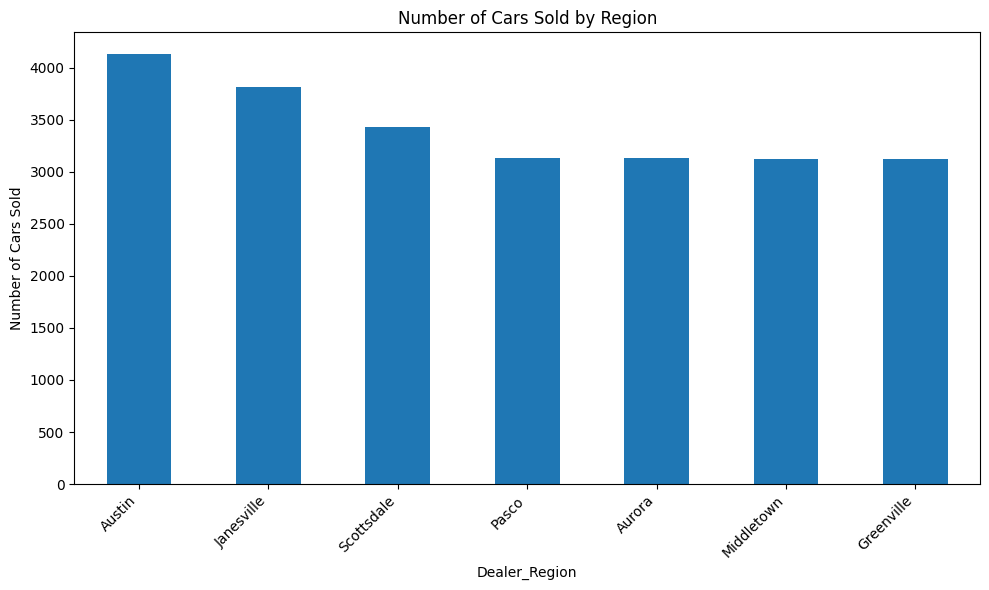

In [37]:
cars_sold_by_region = data1['Dealer_Region'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
cars_sold_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [38]:
data1.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [40]:
#How does the average car price differ between cars with different engine sizesE
average_price_by_engine_size = data1.groupby('Engine')['Price ($)'].mean().reset_index()


In [41]:
average_price_by_engine_size

,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


In [42]:
#How do car prices vary based on the customer’s annual income bracketE
income_bins = [0, 30000, 60000, 90000, 120000, np.inf]
income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k']

In [43]:
income_bins

[0, 30000, 60000, 90000, 120000, inf]

In [44]:
income_labels

['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k']

In [46]:
data1['Income Bracket'] = pd.cut(data1['Annual Income'], bins=income_bins, labels=income_labels)
average_price_by_bracket = data1.groupby('Income Bracket')['Price ($)'].mean().reset_index()
print(average_price_by_bracket)

  Income Bracket     Price ($)
0           <30k  27884.297820
1        30k-60k           NaN
2        60k-90k  43000.000000
3       90k-120k  46001.000000
4          >120k  28146.802995


In [47]:
data1.head(1)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,<30k


In [48]:
#What are the top 5 car models with the highest number of sales, and how does their price distribution lookE
top_5_models = data1['Model'].value_counts().head(5).index.tolist()


In [49]:
top_5_models

['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup']

In [50]:
top_5_data = data1[data1['Model'].isin(top_5_models)]


In [51]:
top_5_models

['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup']

In [52]:
#How does car price vary with engine size across different car colors, and which colors have the highest price
#variationE
price_variation_by_color = data1.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation by Color:\n", price_variation_by_color)


Price Variation by Color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [53]:
data1['Date'] = pd.to_datetime(data1['Date'])


In [54]:
data1["Month"]=data1["Date"].dt.month

In [55]:
data1["Month"]

,Month
0,1
1,1
2,1
3,1
4,1
...,...
23901,12
23902,12
23903,12
23904,12


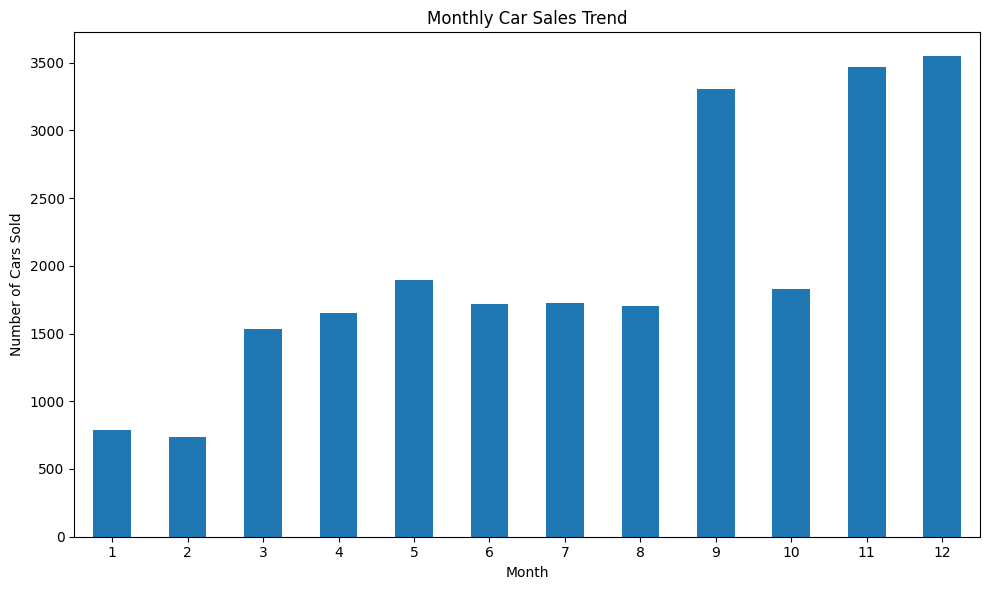

In [58]:
#Is there any seasonal trend in car sales based on the date of saleE
monthly_sales = data1.groupby('Month')['Price ($)'].count()  # Count sales per month

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
monthly_sales.plot(kind='bar')
plt.title('Monthly Car Sales Trend')
plt.xlabel("Month")
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

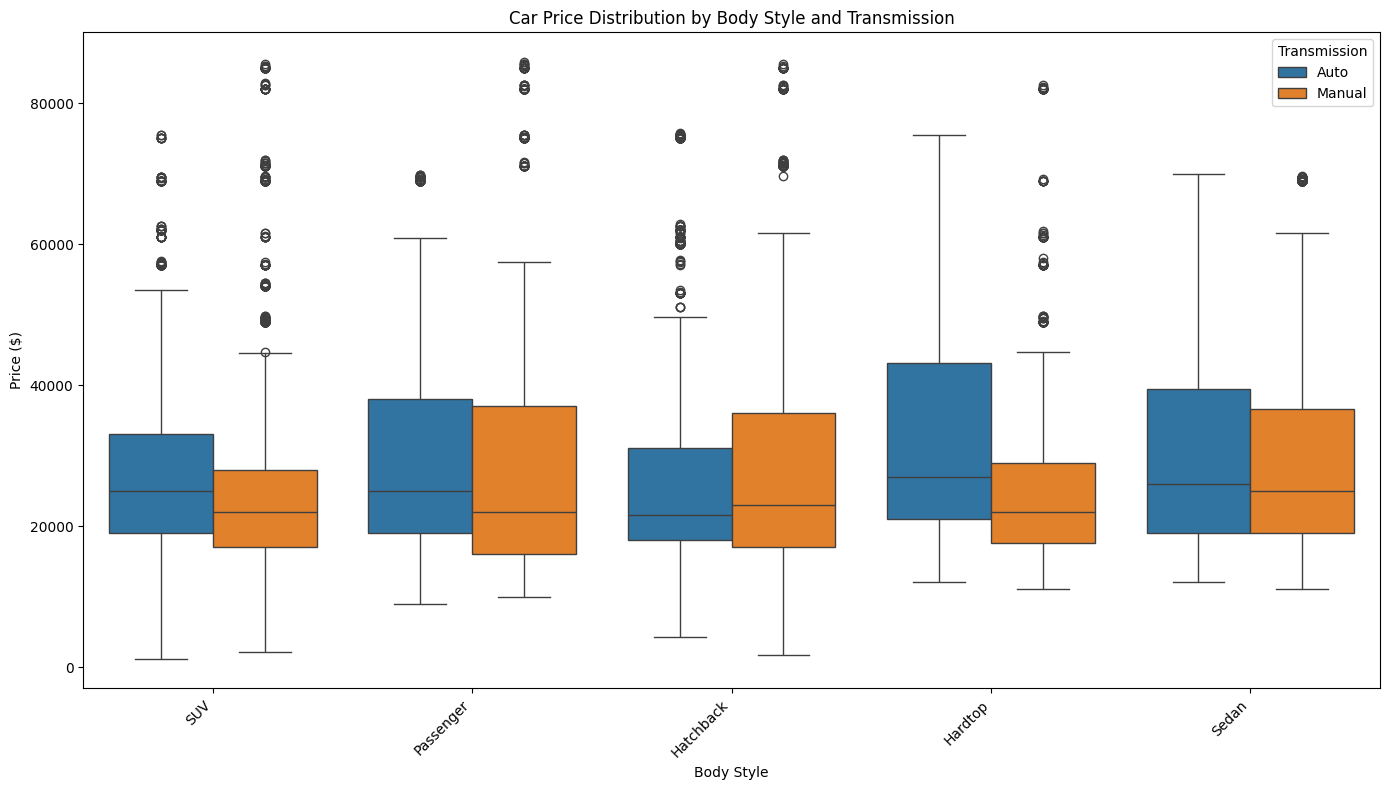

In [59]:
#How does the car price distribution change when considering different combinations of body style and
#transmission type
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data1)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend(title='Transmission', loc='upper right')  # Place legend
plt.tight_layout()
plt.show()

In [64]:
data1['Engine'] = pd.to_numeric(data1['Engine'], errors='coerce').astype('Int64')


In [66]:
#What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact

correlation_matrix = data1[['Price ($)', "Engine",'Annual Income']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


In [63]:
data1.head(1)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,<30k,1
